In [180]:
import requests
import json
import pandas as pd
from pathlib import Path

In [181]:
%store -r clean_sales_weekly_df

In [182]:
limit = 10000000

In [183]:
url = f'https://data.cdc.gov/resource/u6jv-9ijr.json?$limit={limit}'

In [184]:
data = requests.get(url)
data

<Response [200]>

In [185]:
data = data.json()

In [186]:
df = pd.DataFrame(data)
df

,jurisdiction,week_ending_date,state_abbreviation,mmwryear,mmwrweek,cause_group,number_of_deaths,cause_subgroup,time_period,average_number_of_deaths,type,difference_from_2015_2019_to_2020,percent_difference_from_15_19_to_20,note
0,New Jersey,2018-02-03T00:00:00.000,NJ,2018,5,Other select causes,49,Sepsis,2015-2019,42,Predicted (weighted),NaN,NaN,NaN
1,Alabama,2015-01-10T00:00:00.000,AL,2015,1,Other select causes,22,Sepsis,2015-2019,24,Predicted (weighted),NaN,NaN,NaN
2,Alabama,2015-01-10T00:00:00.000,AL,2015,1,Other select causes,22,Sepsis,2015-2019,24,Unweighted,NaN,NaN,NaN
3,Alabama,2016-01-09T00:00:00.000,AL,2016,1,Other select causes,13,Sepsis,2015-2019,24,Predicted (weighted),NaN,NaN,NaN
4,Alabama,2016-01-09T00:00:00.000,AL,2016,1,Other select causes,13,Sepsis,2015-2019,24,Unweighted,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481135,Oregon,2023-04-22T00:00:00.000,OR,2023,16,Alzheimer disease and dementia,77,Alzheimer disease and dementia,2023,77,Predicted (weighted),-2,-2.5,Data in recent weeks are incomplete. Only 60% ...
481136,Oregon,2022-04-23T00:00:00.000,OR,2022,16,Alzheimer disease and dementia,98,Alzheimer disease and dementia,2022,98,Unweighted,NaN,NaN,Data in recent weeks are incomplete. Only 60% ...
481137,Oregon,2022-04-23T00:00:00.000,OR,2022,16,Alzheimer disease and dementia,98,Alzheimer disease and dementia,2022,98,Predicted (weighted),19,24.1,Data in recent weeks are incomplete. Only 60% ...
481138,Oregon,2021-04-24T00:00:00.000,OR,2021,16,Alzheimer disease and dementia,79,Alzheimer disease and dementia,2021,79,Unweighted,NaN,NaN,NaN


In [187]:
df['time_period'].unique()

array(['2015-2019', '2020', '2021', '2022', '2023'], dtype=object)

In [188]:
df['cause_group'].unique()

array(['Other select causes', 'Respiratory diseases',
       'Circulatory diseases', 'Malignant neoplasms',
       'Alzheimer disease and dementia'], dtype=object)

In [189]:
df = df.loc[df['type'] == "Unweighted"]

In [190]:
respiratory_df = df.loc[df['cause_subgroup'] == 'Influenza and pneumonia']
respiratory_df

,jurisdiction,week_ending_date,state_abbreviation,mmwryear,mmwrweek,cause_group,number_of_deaths,cause_subgroup,time_period,average_number_of_deaths,type,difference_from_2015_2019_to_2020,percent_difference_from_15_19_to_20,note
221053,Alabama,2015-01-10T00:00:00.000,AL,2015,1,Respiratory diseases,48,Influenza and pneumonia,2015-2019,34,Unweighted,NaN,NaN,NaN
221055,Alabama,2016-01-09T00:00:00.000,AL,2016,1,Respiratory diseases,26,Influenza and pneumonia,2015-2019,34,Unweighted,NaN,NaN,NaN
221057,Alabama,2017-01-07T00:00:00.000,AL,2017,1,Respiratory diseases,29,Influenza and pneumonia,2015-2019,34,Unweighted,NaN,NaN,NaN
221059,Alabama,2018-01-06T00:00:00.000,AL,2018,1,Respiratory diseases,44,Influenza and pneumonia,2015-2019,34,Unweighted,NaN,NaN,NaN
221061,Alabama,2019-01-05T00:00:00.000,AL,2019,1,Respiratory diseases,21,Influenza and pneumonia,2015-2019,34,Unweighted,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248211,Wisconsin,2016-12-31T00:00:00.000,WI,2016,52,Respiratory diseases,16,Influenza and pneumonia,2015-2019,16,Unweighted,NaN,NaN,NaN
248213,Wisconsin,2017-12-30T00:00:00.000,WI,2017,52,Respiratory diseases,19,Influenza and pneumonia,2015-2019,16,Unweighted,NaN,NaN,NaN
248215,Wisconsin,2018-12-29T00:00:00.000,WI,2018,52,Respiratory diseases,16,Influenza and pneumonia,2015-2019,16,Unweighted,NaN,NaN,NaN
248217,Wisconsin,2019-12-28T00:00:00.000,WI,2019,52,Respiratory diseases,11,Influenza and pneumonia,2015-2019,16,Unweighted,NaN,NaN,NaN


In [191]:
df.columns

Index(['jurisdiction', 'week_ending_date', 'state_abbreviation', 'mmwryear',
       'mmwrweek', 'cause_group', 'number_of_deaths', 'cause_subgroup',
       'time_period', 'average_number_of_deaths', 'type',
       'difference_from_2015_2019_to_2020',
       'percent_difference_from_15_19_to_20', 'note'],
      dtype='object')

In [192]:
df['type'].unique()

array(['Unweighted'], dtype=object)

I want this to be a dataset of actual, rather than predicted so let's filter for that. 

In [193]:
respiratory_df = respiratory_df[['week_ending_date', 'number_of_deaths','average_number_of_deaths' ]]

In [194]:
respiratory_df['week_ending_date'] = pd.to_datetime(respiratory_df['week_ending_date'])
respiratory_df['number_of_deaths'] = pd.to_numeric(respiratory_df['number_of_deaths'])
respiratory_df['average_number_of_deaths'] = pd.to_numeric(respiratory_df['average_number_of_deaths'])


C:\Users\risab\AppData\Local\Temp\ipykernel_46496\1629822269.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respiratory_df['week_ending_date'] = pd.to_datetime(respiratory_df['week_ending_date'])
C:\Users\risab\AppData\Local\Temp\ipykernel_46496\1629822269.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respiratory_df['number_of_deaths'] = pd.to_numeric(respiratory_df['number_of_deaths'])
C:\Users\risab\AppData\Local\Temp\ipykernel_46496\1629822269.py:3: SettingWithCopyWarning: 
A value is trying t

In [195]:
respiratory_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13584 entries, 221053 to 248219
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   week_ending_date          13584 non-null  datetime64[ns]
 1   number_of_deaths          13584 non-null  int64         
 2   average_number_of_deaths  13584 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 424.5 KB


In [196]:
respiratory_df = respiratory_df.groupby(by='week_ending_date').sum()

In [197]:
respiratory_df = respiratory_df.sort_index()
respiratory_df

,number_of_deaths,average_number_of_deaths
week_ending_date,,
2015-01-10,5190,3729
2015-01-17,4716,3844
2015-01-24,4183,3653
2015-01-31,3722,3451
2015-02-07,3461,3320
...,...,...
2023-08-12,1196,1196
2023-08-19,1003,1003
2023-08-26,1090,1090


<Axes: xlabel='week_ending_date'>

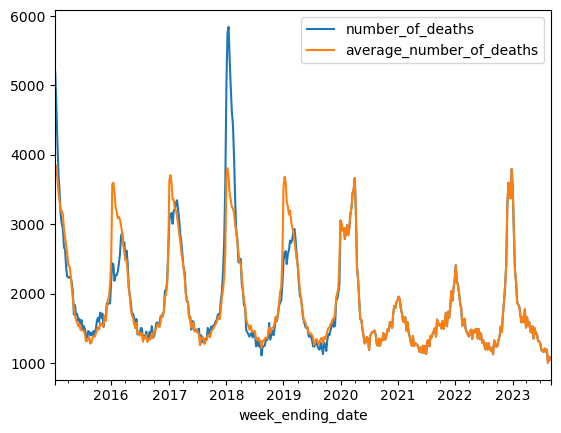

In [198]:
respiratory_df.plot()

<Axes: xlabel='week_ending_date'>

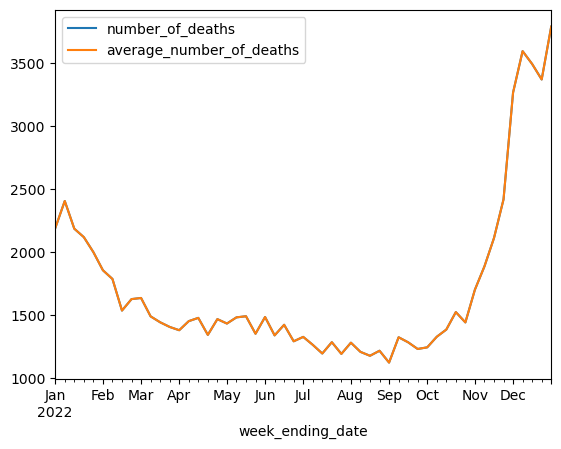

In [199]:
respiratory_df.loc['2022'].plot()

In [200]:
df = df[['week_ending_date', 'number_of_deaths','average_number_of_deaths' ]]

In [201]:
df['week_ending_date'] = pd.to_datetime(df['week_ending_date'])
df['number_of_deaths'] = pd.to_numeric(df['number_of_deaths'])
df['average_number_of_deaths'] = pd.to_numeric(df['average_number_of_deaths'])

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 240570 entries, 2 to 481138
Data columns (total 3 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   week_ending_date          240570 non-null  datetime64[ns]
 1   number_of_deaths          240570 non-null  int64         
 2   average_number_of_deaths  240570 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 7.3 MB


In [203]:
df = df.groupby(by='week_ending_date').sum()

<Axes: xlabel='week_ending_date'>

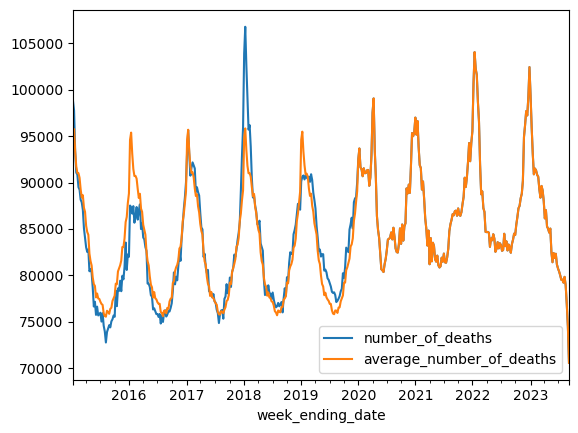

In [204]:
df.plot()

<Axes: xlabel='week_ending_date'>

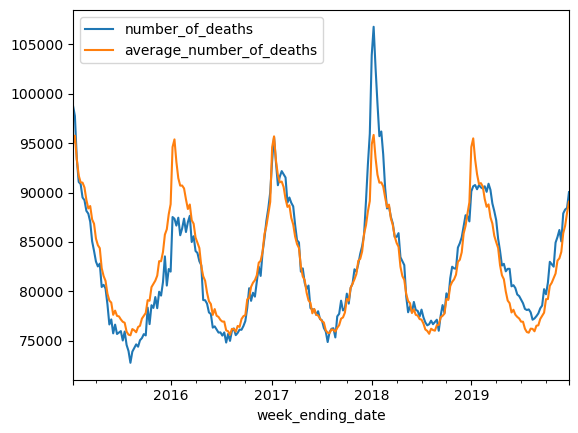

In [205]:
df.loc['2014':'2019'].plot()

In [206]:
clean_sales_weekly_df = clean_sales_weekly_df[['Drugs for Obstructive Airway Diseases']]

<Axes: xlabel='Date', ylabel='Sales Volume'>

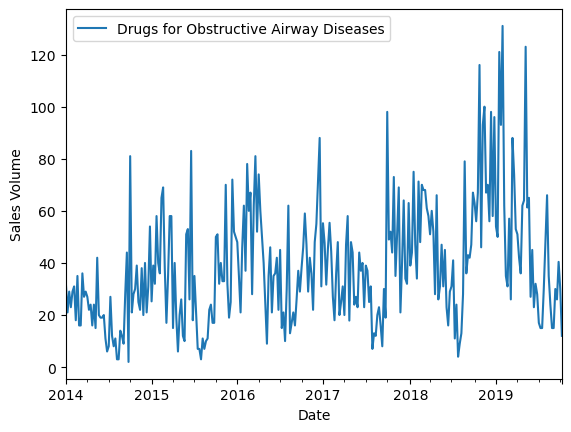

In [207]:
clean_sales_weekly_df.plot(ylabel='Sales Volume')

In [208]:
df = df.reset_index()
df['week'] = df['week_ending_date'].dt.isocalendar().week
df['year'] = df['week_ending_date'].dt.year
df

,week_ending_date,number_of_deaths,average_number_of_deaths,week,year
0,2015-01-10,98809,94902,2,2015
1,2015-01-17,97758,95755,3,2015
2,2015-01-24,93411,93344,4,2015
3,2015-01-31,91069,91723,5,2015
4,2015-02-07,90854,91028,6,2015
...,...,...,...,...,...
448,2023-08-12,79836,79836,32,2023
449,2023-08-19,78931,78931,33,2023
450,2023-08-26,76870,76870,34,2023
451,2023-09-02,74477,74477,35,2023


In [209]:
clean_sales_weekly_df

,Drugs for Obstructive Airway Diseases
Date,
2014-01-05,32.000000
2014-01-12,21.000000
2014-01-19,29.000000
2014-01-26,23.000000
2014-02-02,29.000000
...,...
2019-09-15,30.000000
2019-09-22,26.000000
2019-09-29,40.416667


In [210]:
clean_sales_weekly_df = clean_sales_weekly_df.reset_index()
clean_sales_weekly_df['week'] = clean_sales_weekly_df['Date'].dt.isocalendar().week
clean_sales_weekly_df['year'] = clean_sales_weekly_df['Date'].dt.year
clean_sales_weekly_df

,Date,Drugs for Obstructive Airway Diseases,week,year
0,2014-01-05,32.000000,1,2014
1,2014-01-12,21.000000,2,2014
2,2014-01-19,29.000000,3,2014
3,2014-01-26,23.000000,4,2014
4,2014-02-02,29.000000,5,2014
...,...,...,...,...
297,2019-09-15,30.000000,37,2019
298,2019-09-22,26.000000,38,2019
299,2019-09-29,40.416667,39,2019
300,2019-10-06,30.000000,40,2019


In [211]:
new_df = pd.merge(df, clean_sales_weekly_df, on=['week', 'year'])

In [212]:
new_df = new_df.dropna()[['Date','number_of_deaths', 'Drugs for Obstructive Airway Diseases']]
new_df

,Date,number_of_deaths,Drugs for Obstructive Airway Diseases
0,2015-01-11,98809,39.000000
1,2015-01-18,97758,32.000000
2,2015-01-25,93411,58.000000
3,2015-02-01,91069,40.000000
4,2015-02-08,90854,36.000000
...,...,...,...
244,2019-09-15,78275,30.000000
245,2019-09-22,78559,26.000000
246,2019-09-29,80219,40.416667
247,2019-10-06,79700,30.000000


In [213]:
new_df = new_df.set_index('Date')


In [214]:
new_df['number_of_deaths'] = new_df['number_of_deaths']/1000

In [218]:
new_df['number_of_deaths'] = new_df['number_of_deaths']/ 100

<Axes: xlabel='Date'>

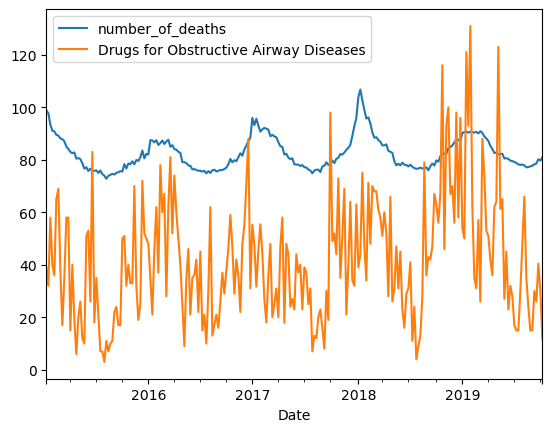

In [220]:
new_df = new_df.sort_index()
new_df.plot()

In [222]:
new_df.corr()

,number_of_deaths,Drugs for Obstructive Airway Diseases
number_of_deaths,1.000000,0.392704
Drugs for Obstructive Airway Diseases,0.392704,1.000000
